<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Breast_Cancer_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [145]:
df = pd.read_csv('/content/Breast_Cancer_Data.csv')

In [146]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
df.shape

(569, 33)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [149]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [150]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [151]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [152]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
145,869476,B,11.90,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,...,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360,NaN
240,88350402,B,13.64,15.60,87.38,575.3,0.09423,0.0663,0.04705,0.03731,...,19.05,94.11,683.4,0.12780,0.1291,0.1533,0.09222,0.2530,0.06510,NaN
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,...,25.26,105.80,819.7,0.09445,0.2167,0.1565,0.07530,0.2636,0.07676,NaN


1 --> Benign

0 --> Malignant

In [153]:
df['diagnosis'].replace({'B':1,'M':0},inplace=True)

In [154]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
117,864729,0,14.87,16.67,98.64,682.5,0.1162,0.16490,0.169000,0.089230,...,27.37,127.10,1095.0,0.1878,0.44800,0.470400,0.20270,0.3585,0.10650,NaN
72,859717,0,17.20,24.52,114.20,929.4,0.1071,0.18300,0.169200,0.079440,...,33.82,151.60,1681.0,0.1585,0.73940,0.656600,0.18990,0.3313,0.13390,NaN
58,857810,1,13.05,19.31,82.61,527.2,0.0806,0.03789,0.000692,0.004167,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,NaN


In [155]:
df.drop(columns='id',inplace=True)
df.drop(columns='Unnamed: 32',inplace=True)

In [156]:
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
372,0,21.370,15.10,141.30,1386.0,0.10010,0.1515,0.19320,0.125500,0.1973,...,22.69,21.84,152.1,1535.0,0.1192,0.28400,0.4024,0.19660,0.2730,0.08666
548,1,9.683,19.34,61.05,285.7,0.08491,0.0503,0.02337,0.009615,0.1580,...,10.93,25.59,69.1,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920
29,0,17.570,15.05,115.00,955.1,0.09847,0.1157,0.09875,0.079530,0.1739,...,20.01,19.52,134.9,1227.0,0.1255,0.28120,0.2489,0.14560,0.2756,0.07919


In [157]:
x = df.drop(columns='diagnosis')
y = df['diagnosis']

In [158]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [160]:
x_train.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
335,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,...,20.99,33.15,143.2,1362.0,0.1449,0.2053,0.3920,0.18270,0.2623,0.07599
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,22.03,25.07,146.0,1479.0,0.1665,0.2942,0.5308,0.21730,0.3032,0.08075
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.2,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234


In [161]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [162]:
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
model = Sequential()

model.add(Dense(12, input_dim=30, activation='relu'))
# model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
# Early Stopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [166]:
history = model.fit(x_train_scaled,y_train,batch_size=100,epochs=1000,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.8778 - accuracy: 0.3805 - val_loss: 0.7551 - val_accuracy: 0.5250
Epoch 2/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.8124 - accuracy: 0.4434 - val_loss: 0.7009 - val_accuracy: 0.5875
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7539 - accuracy: 0.4811 - val_loss: 0.6511 - val_accuracy: 0.6375
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7014 - accuracy: 0.5755 - val_loss: 0.6070 - val_accuracy: 0.7000
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6567 - accuracy: 0.6415 - val_loss: 0.5673 - val_accuracy: 0.7625
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6128 - accuracy: 0.6950 - val_loss: 0.5333 - val_accuracy: 0.7875
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5750 - accuracy: 0.7327 - val_loss: 0.5040 - val_accuracy: 0.8500
Epoch 8/1000


In [167]:
y_log = model.predict(x_test_scaled)

In [ ]:
y_log

In [169]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766081871345029

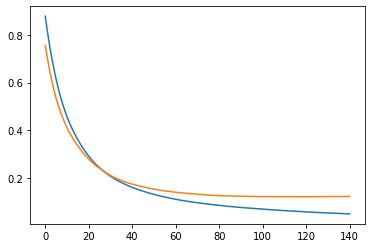

In [172]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

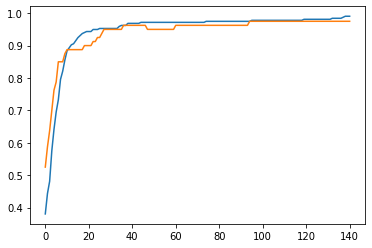

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])